In [5]:
from toybox.interventions.amidar import *
from toybox.interventions.base import *
from toybox.interventions.core import * 
from toybox import Toybox, Input

import numpy as np
from matplotlib.pyplot import imshow, subplots, tight_layout
import random

ModuleNotFoundError: No module named 'toybox'

In [8]:
#    with AmidarIntervention(tb) as intervention: 
#      converted = WorldPoint(intervention, x =tb.state_to_json()['player']['position']['x'], y = tb.state_to_json()['player']['position']['y'] )
#      print(intervention.worldpoint_to_tilepoint(converted)) 

In [9]:
# unsorted_edges = filter(lambda x: x['triggers_chase'] == True ,tb.state_to_json()['board']['boxes'])
# edges = sorted(list(unsorted_edges), key = lambda x: x['top_left']['tx'] + x['top_left']['ty'] + x['bottom_right']['tx'] + x['bottom_right']['ty'])

def get_corners(edges): #returns world-coordinates of corners of the map
    
    #how do you convert from world-points to screen points???
    
    top_left_corner = {'x' : (edges[0]['top_left']['tx'] ), 'y' : (edges[0]['top_left']['ty'])} 
    bottom_left_corner = {'x': edges[1]['top_left']['tx'], 'y': edges[1]['bottom_right']['ty']} #how to convert from tx to x?
    top_right_corner = {'x': edges[2]['top_left']['ty'], 'y': edges[2]['bottom_right']['tx']}
    bottom_right_corner = {'x': edges[3]['bottom_right']['tx'], 'y': edges[3]['bottom_right']['ty']}
    
    return [top_left_corner, bottom_left_corner, top_right_corner, bottom_right_corner]

In [10]:
def get_walls(tiles):
    
    walls = []
    
    for i in range(len(tiles)):
        for j in range(len(tiles[i])):
            if tiles[i][j] == 'Empty':
                coord = {'tx': i , 'ty': j}
                walls.append(coord)
    return walls  

[{'top_left': {'tx': 0, 'ty': 0}, 'bottom_right': {'tx': 6, 'ty': 6}, 'painted': False, 'triggers_chase': True}, {'top_left': {'tx': 0, 'ty': 24}, 'bottom_right': {'tx': 6, 'ty': 30}, 'painted': False, 'triggers_chase': True}, {'top_left': {'tx': 25, 'ty': 0}, 'bottom_right': {'tx': 31, 'ty': 6}, 'painted': False, 'triggers_chase': True}, {'top_left': {'tx': 25, 'ty': 24}, 'bottom_right': {'tx': 31, 'ty': 30}, 'painted': False, 'triggers_chase': True}]


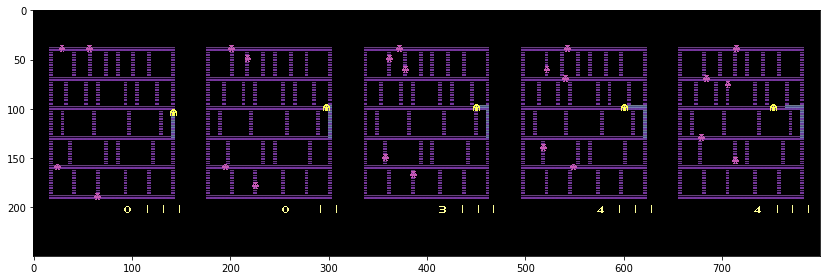

In [14]:
move = Input()
move.up = True

frames = []

with Toybox('amidar') as tb:     
    
    
    unsorted_edges = filter(lambda x: x['triggers_chase'] == True ,tb.state_to_json()['board']['boxes'])
    edges = sorted(list(unsorted_edges), key = lambda x: x['top_left']['tx'] + x['top_left']['ty'] + x['bottom_right']['tx'] + x['bottom_right']['ty'])

    print(edges)
    junctions = tb.state_to_json()['board']['junctions'] #all junctions in board

    
    for i in range(120):
        tb.apply_action(move)
        pos = tb.state_to_json()['player']['position'] #player position        
        enemy1 = tb.state_to_json()['enemies'][0]['position']
        enemy2 = tb.state_to_json()['enemies'][1]['position']
        enemy3 = tb.state_to_json()['enemies'][2]['position']
        enemy4 = tb.state_to_json()['enemies'][3]['position'] 
                        
        
        if pos['y'] in junctions:
            move.up, move.left = False, True
        if i % 20 == 0 and i >0 :
            frames.append(tb.get_rgb_frame())
            
# render the images we collected horizontally:
subplots(figsize=(len(frames)*3, 4))
imshow(np.hstack(frames))
tight_layout() # makes it a little bigger.